In [35]:
## https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [36]:
import os 
import json
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.pipeline import make_pipeline
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, mean_squared_error



In [37]:
import os 
import json
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, mean_squared_error

In [38]:
import os
# Office
os.chdir('C:\\Users\\prudi\\Documents\\GitHub\\Code\\NITDATA\\Algorithms\\codesnippetsforbaggingandboostingalgorithms')
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

class PreProcessing(BaseEstimator, TransformerMixin):


    def __init__(self):
        pass

    
    ## Here this model will be called with a variable (df), which is a dataframe
    def datapreprocessing(self, df):
        
        df = df.reset_index(drop=True)
        
        df.loc[df['Gender'].isnull(),'Gender']='Trasgender'
        df.loc[df['Dependents'].isnull(),'Dependents']='0'
        df.loc[df['Education'].isnull(),'Education']='No Education'
        df.loc[df['Married'].isnull(),'Married']='No'
        df.loc[df['Self_Employed'].isnull(),'Self_Employed']='No'
        df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=0
        df.loc[df['Credit_History'].isnull(),'Credit_History']=0
        df.loc[df['LoanAmount'].isnull(),'LoanAmount']=146.867     
        df['Credit_History']=df['Credit_History'].astype(str)
        
        
        ## Creating a Instance for the minmax Pickle File
        MinMaxpickle_in = open("minmax_pickle.pkl","rb")
        MinmaxScaler_dict = pickle.load(MinMaxpickle_in)
        
        ## Applying the pickle file
        df['ApplicantIncome']=pd.DataFrame(MinmaxScaler_dict['ApplicantIncome'].transform(df[['ApplicantIncome']]))
        
        ## Creating a Instance for the minmax Pickle File
        standardscaler_in = open("standardscaler_pickle.pkl","rb")
        standardscaler_dict = pickle.load(standardscaler_in)
        
        ## Applying the pickle file
        df['LoanAmount']=pd.DataFrame(standardscaler_dict['LoanAmount'].transform(df[['LoanAmount']]))
        
        ## Creating a Instance for the LabelEncoder Pickle File
        Labelencoderpickle_in = open("labelencoder_pickle.pkl","rb")
        Labelencoder_dict = pickle.load(Labelencoderpickle_in)
        
        ## Applying the pickle file
        df['Education']=pd.DataFrame(Labelencoder_dict['Education'].transform(df[['Education']]))
        df['Property_Area']=pd.DataFrame(Labelencoder_dict['Property_Area'].transform(df[['Property_Area']]))
        df['Credit_History']=pd.DataFrame(Labelencoder_dict['Credit_History'].transform(df[['Credit_History']]))
        df['Dependents']=pd.DataFrame(Labelencoder_dict['Dependents'].transform(df[['Dependents']]))
        
        ## Creating a Instance for the binarizer Pickle File
        Onehotpickle_in = open("binarizer_pickle.pkl","rb")
        Onehot_dict = pickle.load(Onehotpickle_in)
        
        ## Applying the pickle file
        d1=pd.DataFrame(Onehot_dict['Self_Employed'].transform(df[['Self_Employed']]))
        d1.columns=['Self_Employed_0']
        d2=pd.DataFrame(Onehot_dict['Married'].transform(df[['Married']]))
        d2.columns=['Married_0']
        d3=pd.DataFrame(Onehot_dict['Gender'].transform(df[['Gender']]))
        d3.columns=['Gender_0','Gender_1','Gender_2']
    
        df=df.drop(['Self_Employed','Married','Gender','Loan_ID'],axis=1)
        df=pd.concat([df,d1,d2,d3],axis=1)
        
        return df

    def definingvalues(self, df, y=None,**fit_params):
        self.term_mean_ = df['Loan_Amount_Term'].mean()
        self.amt_mean_ = df['LoanAmount'].mean()
        return self
    
    def encodingTargetVariable(self,df):
        Labelencoderpickle_in = open("labelencoder_pickle.pkl","rb")
        Labelencoder_dict = pickle.load(Labelencoderpickle_in)
        
        ## Applying the pickle file
        df['Loan_Status']=pd.DataFrame(Labelencoder_dict['Loan_Status'].transform(df[['Loan_Status']]))
        
        return df.as_matrix()

In [40]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
pred_var = ['Loan_ID','Gender','Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X_train, X_test, y_train, y_test = train_test_split(data[pred_var], data['Loan_Status'], test_size=0.30, random_state=42)

In [42]:
## Creating an instance for the class
preprocess = PreProcessing()

In [43]:
# Calling the fit function present in the class Preprocessing
preprocess.definingvalues(X_train)

PreProcessing()

In [44]:
## Calling the datapreprocessing function present in the class Preprocessing to Preprocess X_train dataset
data_transformed_xtrain = preprocess.datapreprocessing(X_train)

pred_var = ['Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Self_Employed_0', 'Married_0', 'Gender_0', 'Gender_1','Gender_2']


data_transformed_xtrain=pd.DataFrame(data_transformed_xtrain,columns=pred_var)
data_transformed_xtrain.head()

print(data_transformed_xtrain.shape)
print(X_train.shape)

(429, 13)
(429, 12)


In [45]:
data_transformed_xtrain.columns

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Self_Employed_0', 'Married_0', 'Gender_0', 'Gender_1', 'Gender_2'],
      dtype='object')

In [46]:
## Calling the datapreprocessing function present in the class Preprocessing to Preprocess X_test dataset
data_transformed_xtest = preprocess.datapreprocessing(X_test)

# Converting the matrix to a dataframe
data_transformed_xtest=pd.DataFrame(data_transformed_xtest,columns=pred_var)
data_transformed_xtest.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Self_Employed_0,Married_0,Gender_0,Gender_1,Gender_2
0,0,0,0.681284,0.0,1.426199,360.0,1,1,0,1,0,1,0
1,0,0,0.317267,0.0,-0.108986,360.0,0,1,0,1,0,1,0
2,2,0,0.306361,1447.0,0.329638,360.0,1,0,0,1,0,1,0
3,0,0,0.209732,0.0,-1.033230,360.0,1,0,0,0,1,0,0
4,0,0,0.195851,0.0,-1.048895,360.0,1,1,0,0,0,1,0


In [47]:
y_train=pd.DataFrame(y_train).reset_index(drop=True)
y_train.columns=['Loan_Status']

y_test=pd.DataFrame(y_test).reset_index(drop=True)
y_test.columns=['Loan_Status']

y_train=preprocess.encodingTargetVariable(y_train)
y_test=preprocess.encodingTargetVariable(y_test)

Befor you run this code 

You have to install below libraries

pip install xgboost

In [65]:
import xgboost as xgb

In [66]:
xgb_c = xgb.XGBClassifier()

In [67]:
xgb_c.fit(data_transformed_xtrain,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
#feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
model.feature_importances_

array([0.03317225, 0.02385903, 0.06451152, 0.06397067, 0.06561121,
       0.05422448, 0.3862864 , 0.06087452, 0.04451232, 0.05335915,
       0.04032024, 0.08501939, 0.02427877], dtype=float32)

In [69]:
y_train

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [70]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        
        xgb_param = alg.get_xgb_params()
        
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y_train)
        
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
                    
    feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8228
AUC Score (Train): 0.877822


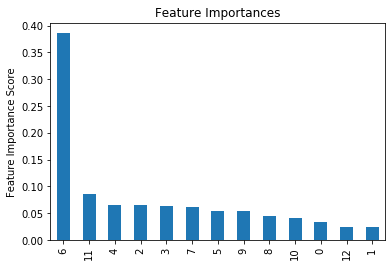

In [71]:
#Choose all predictors except target & IDcols
predictors = [x for x in data_transformed_xtrain.columns if x not in [y_train]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1,data_transformed_xtrain,predictors,y_train)